In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

                                                      2. Tree Based Methods

In [37]:
train_api=pd.read_csv('../Homework 4 Data/aps_failure_training_set.csv',skiprows=20)
train_api

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [38]:
name_list=[]
for index,column in train_api.iteritems():
    name_list.append(index)

                                                       2.(b)

In [39]:
train=train_api
output=train_api['class']
train=train.drop(columns='class')
train=train.replace('na',np.nan)

In [40]:
from sklearn.impute import SimpleImputer
imputation1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputation1.fit(train)
imputed_data1=imputation1.transform(train)
imputed_df1=pd.DataFrame(imputed_data1,columns=name_list[1:])
imputed_df1

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [41]:
cv_vals1=[]
name1=[]
for col in imputed_df1.columns:
    col_mean1=(imputed_df1[col].mean())
    sd1=(imputed_df1[col].std())
    cv1=sd1/col_mean1
    cv_vals1.append(cv1)
    name1.append(col)
df1=pd.DataFrame(cv_vals1,name1)
df1=df1.rename(columns={0:'cv_score'})
df1

,cv_score
aa_000,2.450938
ab_000,2.328400
ac_000,2.169767
ad_000,183.847620
ae_000,23.190937
...,...
ee_007,4.962483
ee_008,3.222010
ee_009,5.626979
ef_000,47.124953


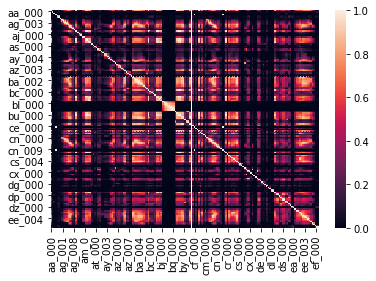

In [42]:
correlation_matrix1 = imputed_df1.corr()
sns.heatmap(correlation_matrix1,vmin=0,vmax=1)
plt.show()

In [43]:
df1.sort_values(by=['cv_score'], inplace=True, ascending=False)
high_score_df1=df1[:13]
high_score_df1

,cv_score
cs_009,235.277605
cf_000,184.233092
co_000,183.949017
ad_000,183.847620
dh_000,114.984991
dj_000,109.647285
ag_000,91.878565
as_000,86.416904
ay_009,83.786063
az_009,76.967978


In [44]:
new_df1=pd.DataFrame()
for index,row_name in high_score_df1.iterrows():
    new_df1=pd.concat([new_df1,imputed_df1[index].reset_index()],axis=1)
new_df1=new_df1.drop(columns='index')
new_df1

,cs_009,cf_000,co_000,ad_000,dh_000,dj_000,ag_000,as_000,ay_009,az_009,ak_000,au_000,ch_000
0,0.0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,190221.810984,190515.566938,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000443
2,0.0,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.000000,224.000000,186.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59996,0.0,2.000000,0.000000,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59997,0.0,2.000000,0.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59998,0.0,2.000000,580.000000,494.000000,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


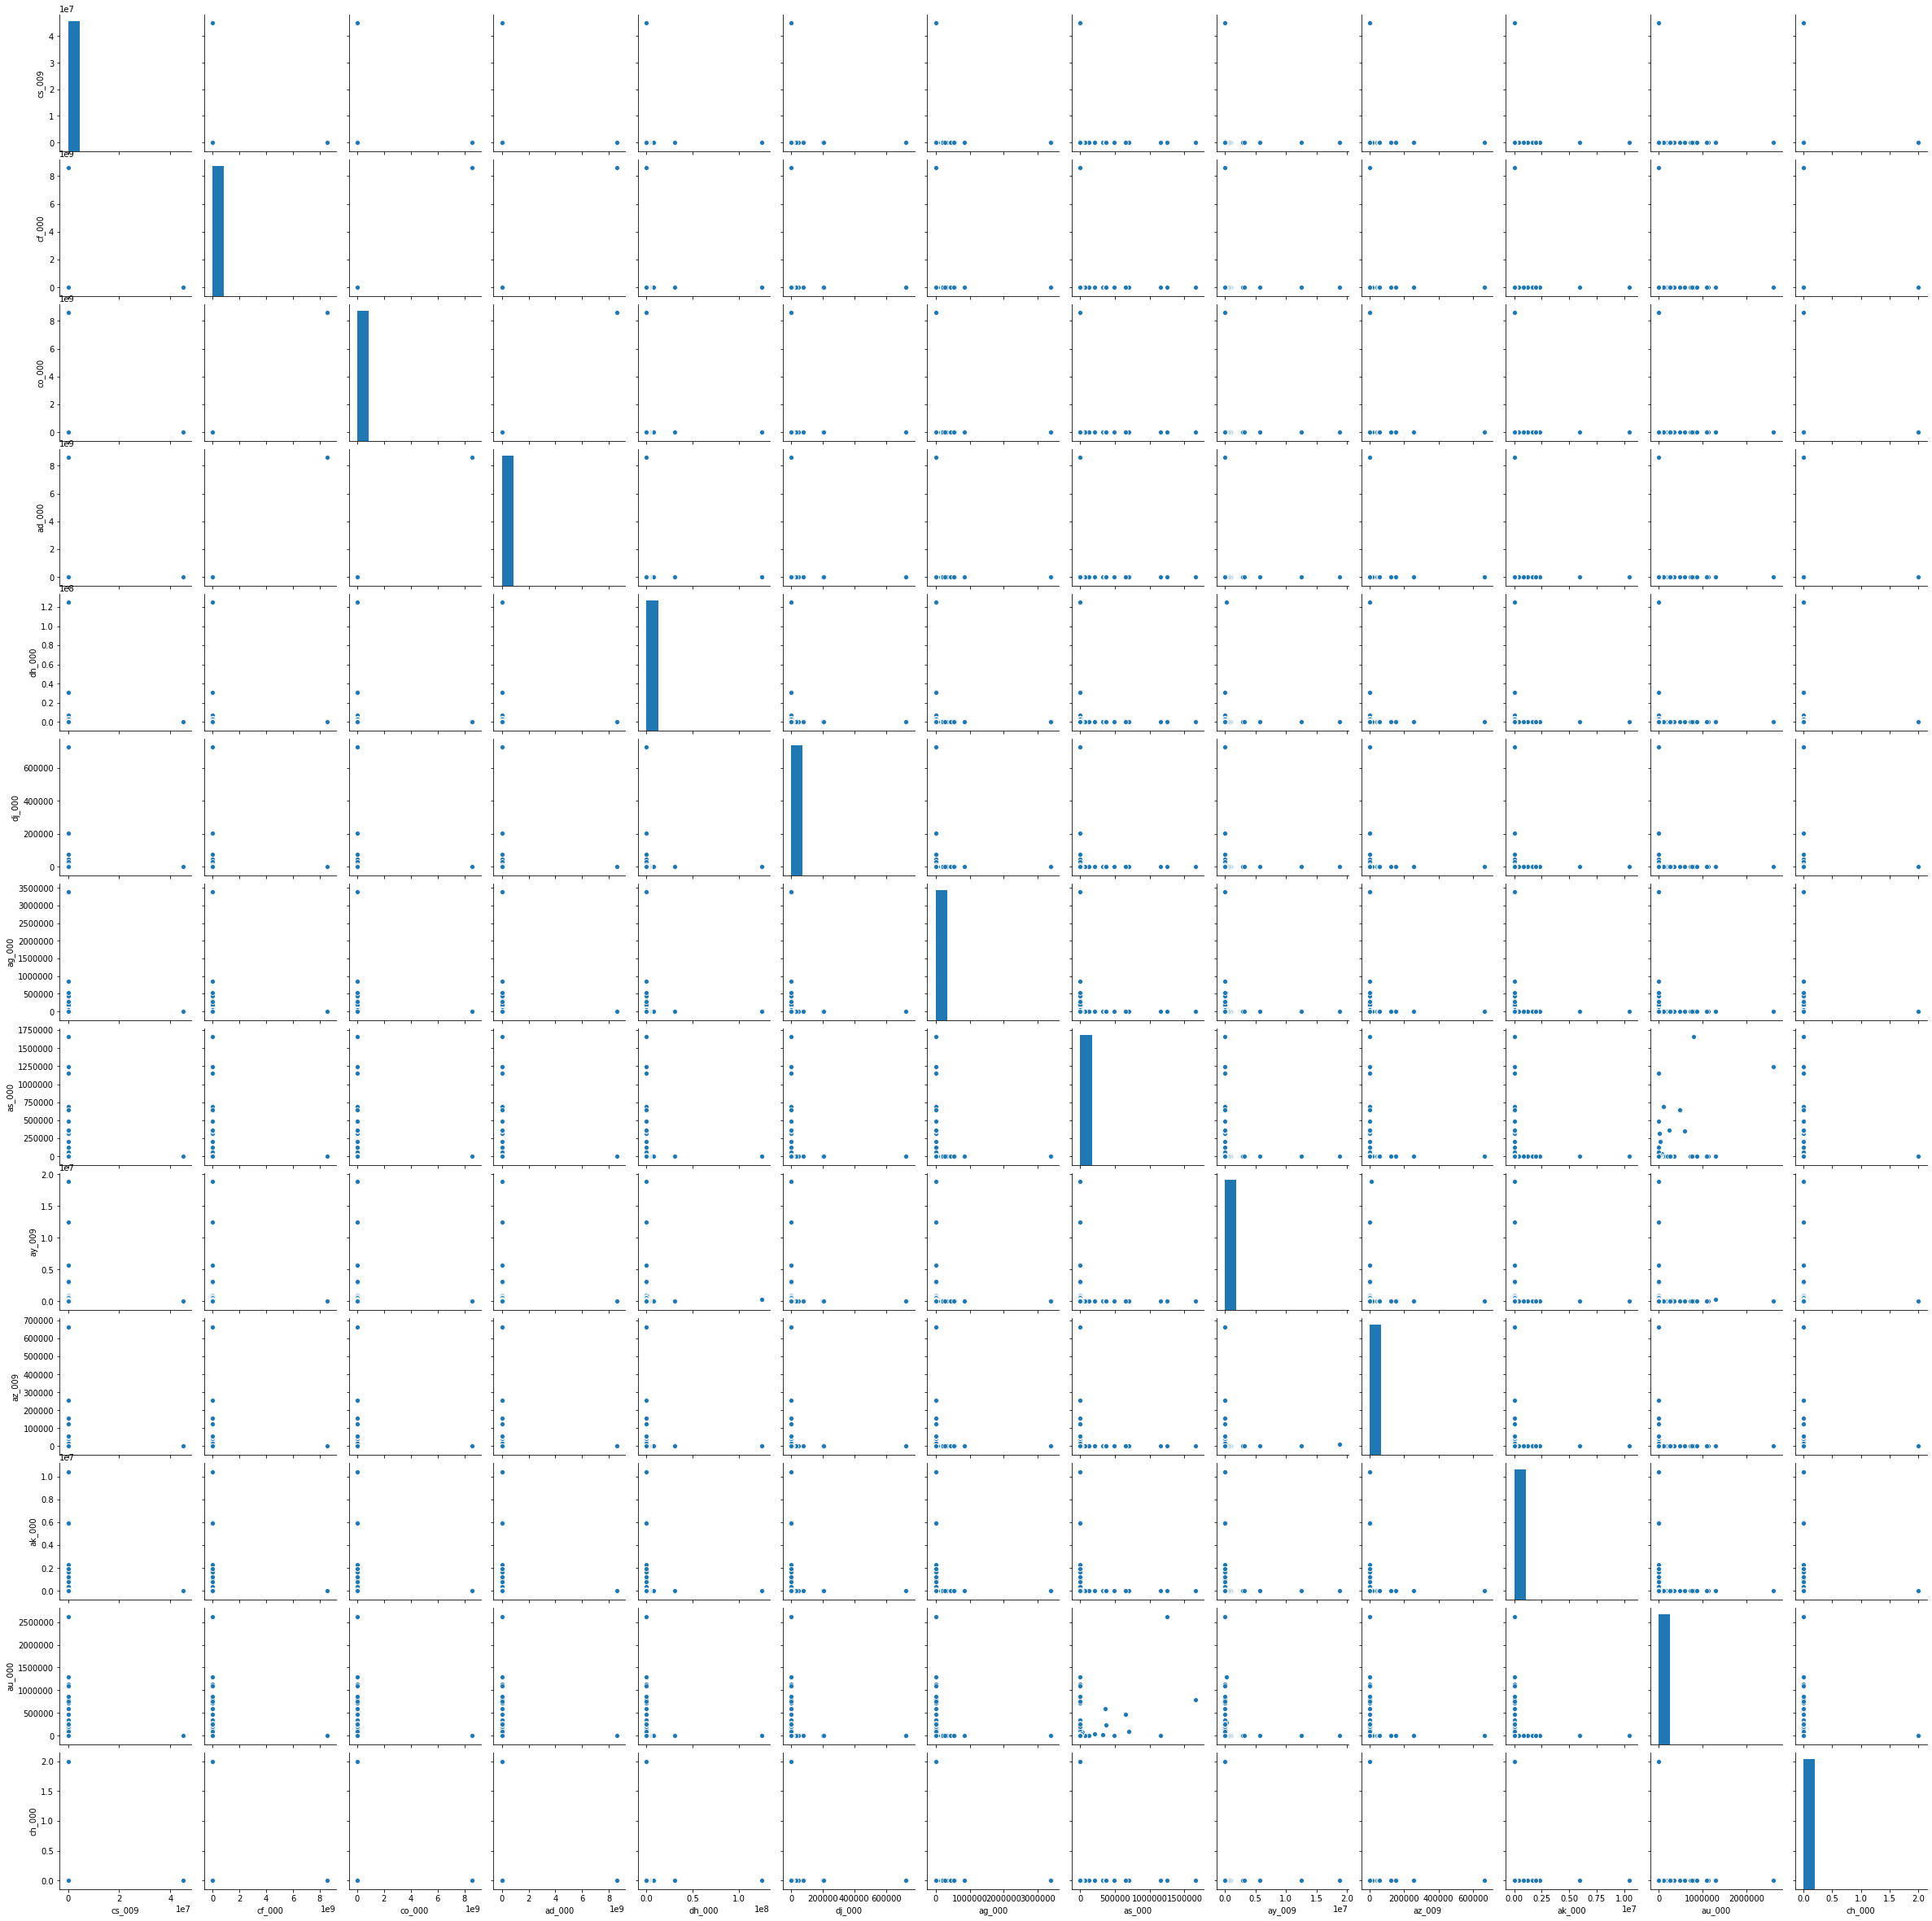

In [45]:
sns.pairplot(data=new_df1,kind='scatter')

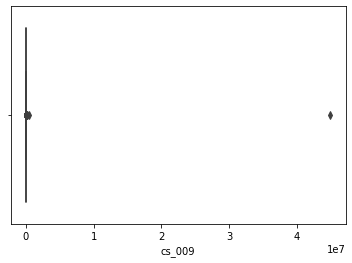

In [46]:
sns.boxplot(imputed_df1['cs_009'])

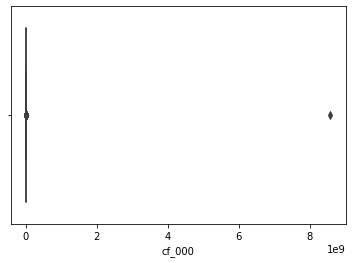

In [47]:
sns.boxplot(imputed_df1['cf_000'])

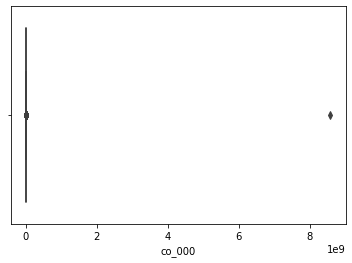

In [48]:
sns.boxplot(imputed_df1['co_000'])

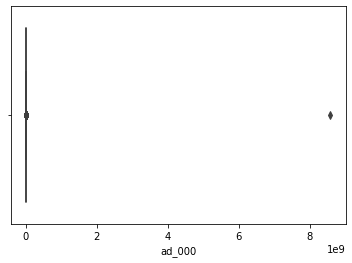

In [49]:
sns.boxplot(imputed_df1['ad_000'])

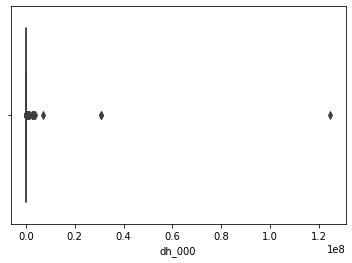

In [50]:
sns.boxplot(imputed_df1['dh_000'])

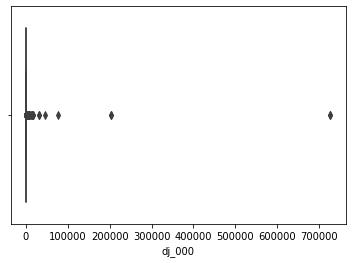

In [51]:
sns.boxplot(imputed_df1['dj_000'])

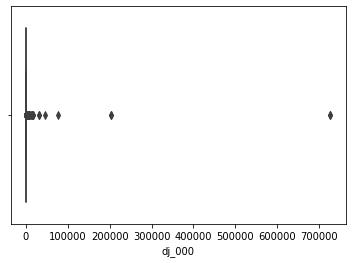

In [52]:
sns.boxplot(imputed_df1['dj_000'])

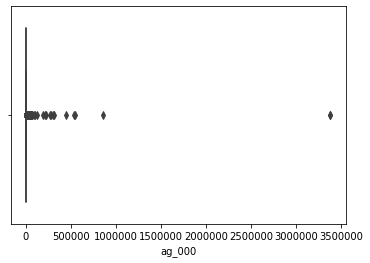

In [53]:
sns.boxplot(imputed_df1['ag_000'])

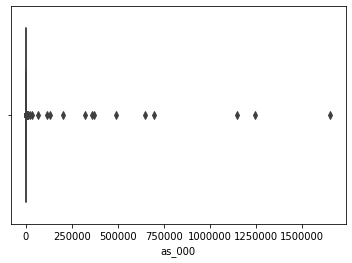

In [54]:
sns.boxplot(imputed_df1['as_000'])

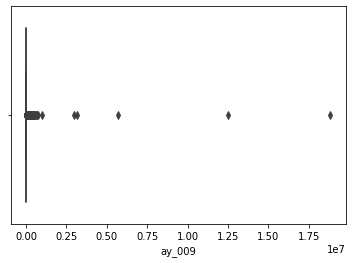

In [55]:
sns.boxplot(imputed_df1['ay_009'])

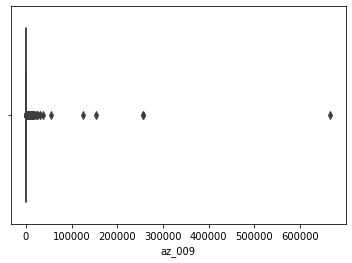

In [56]:
sns.boxplot(imputed_df1['az_009'])

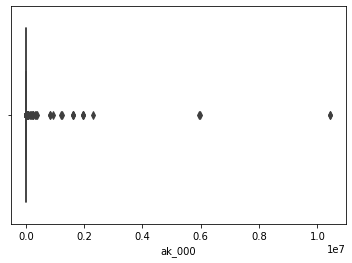

In [57]:
sns.boxplot(imputed_df1['ak_000'])

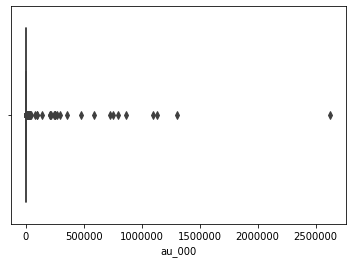

In [58]:
sns.boxplot(imputed_df1['au_000'])

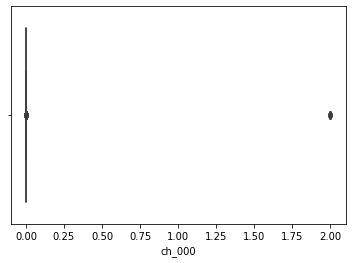

In [59]:
sns.boxplot(imputed_df1['ch_000'])

In [60]:
#Determine the number of positive and negative data
from collections import Counter
Counter(train_api['class'])
#The dataset is imbalanced

Counter({'neg': 59000, 'pos': 1000})

                                                       2.(c)

In [61]:
#Train a random forest classifier
#Plot ROC and AUC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
output=le.fit_transform(output)
rfc=RandomForestClassifier()
rfc.fit(imputed_df1, output)
#Get ROC and AUC
#Confusion matrix also

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
#now we need to get test set
test_api=pd.read_csv('../Homework 4 Data/aps_failure_test_set.csv',skiprows=20)
test_y=test_api['class']
class_output=test_api['class']
test_y=le.fit_transform(test_y)
test_api=test_api.replace('na',np.nan)
test_api=test_api.drop(columns='class')
test_data=imputation1.transform(test_api)
test_x=pd.DataFrame(test_data,columns=name_list[1:])

In [63]:
prediction_test=rfc.predict(test_x)

In [64]:
fpr,tpr,tresh=metrics.roc_curve(test_y,prediction_test)
auc_curve=metrics.auc(fpr,tpr)
auc_curve

0.859424

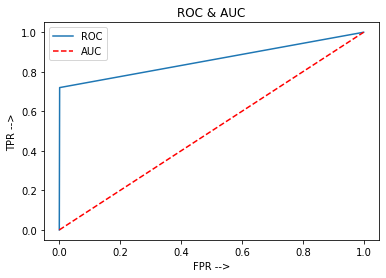

In [65]:
plt.plot(fpr,tpr, label='ROC')
#plt.plot(auc_curve)
auc_curve
plt.plot([0,1],[0,1],'r--', label='AUC')
plt.title('ROC & AUC')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.legend()

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,prediction_test)
print(cm)

[[15607    18]
 [  105   270]]


                                                       2.(d)

In [67]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y1 = sm.fit_sample(imputed_df1, output)

In [68]:
from collections import Counter
Counter(output)

Counter({0: 59000, 1: 1000})

In [69]:
Counter(y1)

Counter({0: 59000, 1: 59000})

In [70]:
rfc1=RandomForestClassifier()
rfc1.fit(X, y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
pre=rfc1.predict(test_x)

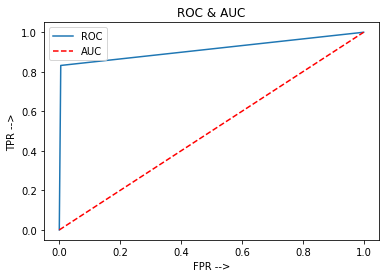

In [72]:
fpr1,tpr1,tresh1=metrics.roc_curve(test_y,pre)
auc_curve=metrics.auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,label='ROC')
plt.plot([0,1],[0,1],'r--',label='AUC')
plt.title('ROC & AUC')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.legend()

In [73]:
auc_curve

0.9136

In [89]:
cm1 = confusion_matrix(test_y,pre)
print(cm1)

[[15550    75]
 [   63   312]]


As it can be seen from the graphs, the results are much better when SMOTE is applied to handle imbalanced classes. 

                                                       2.(e) and 2(f)

In [74]:
n1=pd.concat((imputed_df1,train_api['class']),axis=1)
n2=pd.concat((test_x,class_output),axis=1)
#n1.to_csv('../Homework 4 Data/train.csv',sep=',',index=False)
#n2.to_csv('../Homework 4 Data/test.csv',sep=',',index=False)

In [75]:
import weka.core.jvm as jvm
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
import weka.core.converters as convert
from weka.core.classes import Random
jvm.start(max_heap_size='2048m')

try:
    print("Starting the process for dataset without SMOTE")
    train_data=convert.load_any_file(filename='../Homework 4 Data/train.csv')
    train_data.class_is_last()
    cls = Classifier(classname="weka.classifiers.trees.LMT")
    evaluation=Evaluation(train_data)
    #For 5 fold cross-validation
    evaluation.crossvalidate_model(cls,train_data,5, Random(1))
    print("The error percent in Train is - ")
    print(evaluation.percent_incorrect)
    obj=cls.build_classifier(train_data)
    prediction_tree=evaluation.test_model(cls,train_data)
    
    test_data=convert.load_any_file(filename='../Homework 4 Data/test.csv')
    test_data.class_is_last()
    test_pred=evaluation.test_model(cls,test_data)
    print("The test prediction without smote")
    print(test_pred)
    
    print("Starting the process for dataset with SMOTE")
    list_output=[]
    for i in y1:
        if i == 0:
            list_output.append("neg")
        if i==1:
            list_output.append("pos")
    output_df=pd.DataFrame({'class':list_output})
    #train_smote=pd.concat((X,output_df),axis=1)
    #train_smote.to_csv('../Homework 4 Data/train_smote.csv',sep=',',index=False)
    train_datasmote=convert.load_any_file(filename='../Homework 4 Data/train_smote.csv')
    train_datasmote.class_is_last()
    cls_smote = Classifier(classname="weka.classifiers.trees.LMT")
    evaluation_smote=Evaluation(train_datasmote)
    #For 5 fold cross-validation on smote dataset
    evaluation_smote.crossvalidate_model(cls_smote,train_datasmote,5, Random(1))
    print("The error percent for smote train data is - ")
    print(evaluation_smote.percent_incorrect)
    obj_smote=cls_smote.build_classifier(train_datasmote)
    prediction_treesmote=evaluation_smote.test_model(cls_smote,train_datasmote)

    test_datasmote=convert.load_any_file(filename='../Homework 4 Data/test.csv')
    test_datasmote.class_is_last()
    test_predsmote=evaluation.test_model(cls_smote,test_datasmote)
    print('Test prediction for train data with smote')
    print(test_predsmote)

except Exception as e:
    print(e)
finally:
    if jvm.started:
        jvm.stop()
    

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\admin\\anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\admin\\anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\admin\\anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\admin\\anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\admin\\anaconda3\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=2048m
DEBUG:weka.core.jvm:Package support disabled


Starting the process for dataset without SMOTE
The error percent in Train is - 
0.815
The test prediction without smote
[0. 0. 0. ... 0. 0. 0.]
Starting the process for dataset with SMOTE
The error percent for smote train data is - 
1.3372881355932202
Test prediction for train data with smote
[0. 0. 0. ... 0. 0. 0.]


In [76]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for train data without SMOTE")
cm_train = confusion_matrix(output,prediction_tree)
cm_train

Confusion matrix for train data without SMOTE


array([[58950,    50],
       [  222,   778]], dtype=int64)

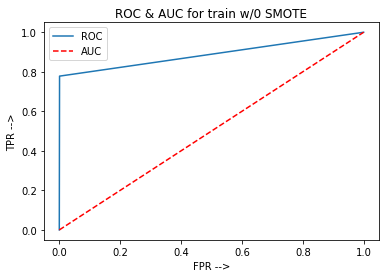

In [77]:
fpr_train,tpr_train,tresh_train=metrics.roc_curve(output,prediction_tree)
auc_curve=metrics.auc(fpr_train,tpr_train)
plt.plot(fpr_train,tpr_train,label='ROC')
plt.plot([0,1],[0,1],'r--',label='AUC')
plt.title('ROC & AUC for train w/0 SMOTE')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.legend()

In [78]:
print("Confusion matrix for test data without SMOTE")
#confusion matrxi for test 
cm_test = confusion_matrix(test_y,test_pred)
print(cm_test)

Confusion matrix for test data without SMOTE
[[15576    49]
 [  104   271]]


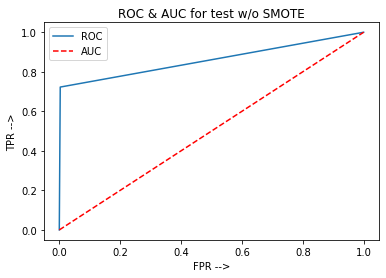

In [79]:
#ROC and AUC based on test
fpr_test,tpr_test,tresh_test=metrics.roc_curve(test_y,test_pred)
auc_curve=metrics.auc(fpr_test,tpr_test)
plt.plot(fpr_test,tpr_test,label='ROC')
plt.plot([0,1],[0,1],'r--',label='AUC')
plt.title('ROC & AUC for test w/o SMOTE')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.legend()

In [80]:
print("Confusion matrix for train data with SMOTE")
cm_train1 = confusion_matrix(y1,prediction_treesmote)
cm_train1

Confusion matrix for train data with SMOTE


array([[57576,  1424],
       [  606, 58394]], dtype=int64)

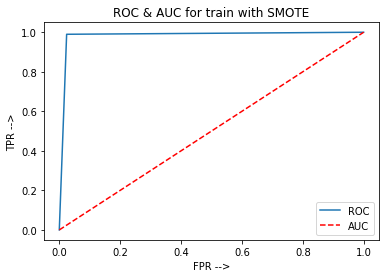

In [86]:
fpr_train1,tpr_train1,tresh_train1=metrics.roc_curve(y1,prediction_treesmote)
auc_curve=metrics.auc(fpr_train1,tpr_train1)
plt.plot(fpr_train1,tpr_train1,label='ROC')
plt.plot([0,1],[0,1],'r--',label='AUC')
plt.title('ROC & AUC for train with SMOTE')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.legend()

In [82]:
print("Confusion matrix for test data with SMOTE")
#confusion matrxi for test 
cm_test1 = confusion_matrix(test_y,test_predsmote)
print(cm_test1)

Confusion matrix for test data with SMOTE
[[15237   388]
 [   29   346]]


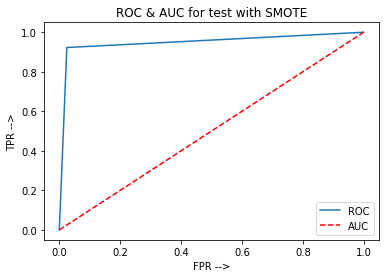

In [87]:
#ROC and AUC based on test
fpr_test1,tpr_test1,tresh_test1=metrics.roc_curve(test_y,test_predsmote)
auc_curve=metrics.auc(fpr_test1,tpr_test1)
plt.plot(fpr_test1,tpr_test1,label='ROC')
plt.plot([0,1],[0,1],'r--',label='AUC')
plt.title('ROC & AUC for test with SMOTE')
plt.xlabel('FPR -->')
plt.ylabel('TPR -->')
plt.legend()

                                                     ISLR 6.8.3

a). The training RSS will steadily decrease. The model flexibility increases, thereby the RSS decreases.


b). The test RSS will decrease initially and then increases in a U-shape. Here, the cofficients are constricted, thereby, the RSS will slowly start increasing. 


c). The variance will steadily increase. 


d). The bias will steadily decrease. 


e). Remains constant. As it is an irreducible error, it remains the same.

                                                    ISLR, 6.8.5

(a) Write out the ridge regression optimization problem in this setting.

Solution: In this setting, we are mainly optimizing the following equation - 

$ (y1−β1x1−β2x1)^2+(y2−β1x2−β2x2)^2+λ(β1^2+β2^2) $

(b) Argue that in this setting, the ridge coefficient estimates satisfy βˆ1 = βˆ2.

Solution:

$ β1(x1^2+x2^2+λ)+β2(x1^2+x2^2)=y1x1+y2x2 $

$ β1(x1^2+x2^2)+β2(x1^2+x2^2+λ)=y1x1+y2x2 $

This is obtained by taking derivatives, now, let us subttract the expressions - 

$ β1(x1^2+x2^2+λ)+β2(x1^2+x2^2)=y1x1+y2x2 - β1(x1^2+x2^2)+β2(x1^2+x2^2+λ)=y1x1+y2x2 $

$ β1λ - β2λ = 0 $

$ β1 = β2 $

Hence, proved.

(c) Write out the lasso optimization problem in this setting

Solution:

$ (y1−β1x1−β2x1)^2+(y2−β1x2−β2x2)^2+λ(|β1|+|β2|) $

Now, the lasso optimiization problem for this setting is shown above

(d) Argue that in this setting, the lasso coefficients βˆ1 and βˆ2 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

Solution:

Now, the alternate form is 

$ (y1−β1x1−β2x1)^2+(y2−β1x2−β2x2)^2 $

ANd finally, we get the expression as  - 

$ β1+β2=s $with β1,β2≥0 and β1+β2=−s with β1,β2≤0 $



                                                    ISLR 8.4.5

There are two approaches, if the majority vote is considered, then we can assign that the observation belongs to the red class, otherwise, if we consider the average probability, then the observation does not belong to the red class is assigned.

                                                    ISLR 9.7.3

a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.


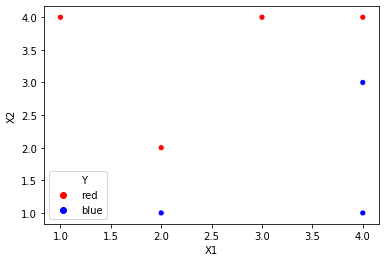

In [130]:
a=[3,2,4,1,2,4,4]
b=[4,2,4,4,1,3,1]
class_y=['red','red','red','red','blue','blue','blue']
class_df=pd.DataFrame({'X1':a,'X2':b,'Y':class_y})
sns.scatterplot(x="X1", y="X2",hue='Y',data=class_df,palette=['red','blue'])

(b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1))

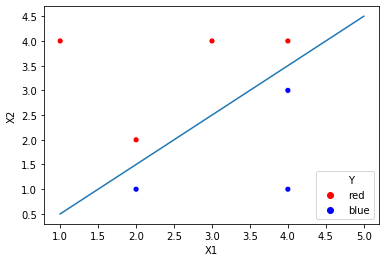

In [131]:
points=np.arange(1,6)
points_y=np.arange(0.5,5.5,1)
sns.scatterplot(x="X1", y="X2",
                     hue="Y",
                     data=class_df,palette=['red','blue'])
plt.plot(points,points_y)

c). Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β

Solution: We can see that, the classification rule is -0.5+X1-X2>0 will give the result as Blue, otherwise, if it is less than or equal to 0 ,then it will give the result as Red. 

d). On your sketch, indicate the margin for the maximal margin hyperplane

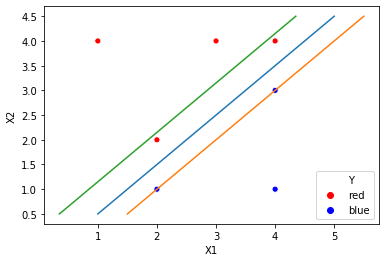

In [132]:
points=np.arange(1,6)
points_y=np.arange(0.5,5.5,1)
points_x1=np.arange(1.5,6.5)
points_x2=np.arange(0.35,5.35)
sns.scatterplot(x="X1", y="X2",
                     hue="Y",
                     data=class_df,palette=['red','blue'])
plt.plot(points,points_y)
plt.plot(points_x1,points_y)
plt.plot(points_x2,points_y)

e). Indicate the support vectors for the maximal margin classifier

Solution: From the above figure, we can see that the support vectors are the ones that belong in the maximum margin, which is, basically the points - (2,2),(2,1),(4,3),(4,4) 

f). Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane

Solution: So the seventh observation would not affect the maximal margin hyperplane.

g). Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane

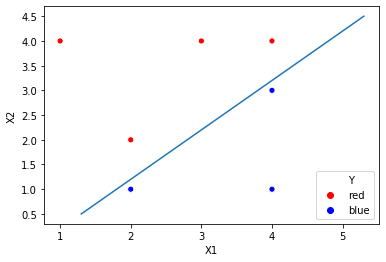

In [133]:
points_x2=np.arange(1.3,6.3,1)
points_y=np.arange(0.5,5.5,1)
sns.scatterplot(x="X1", y="X2",
                     hue="Y",
                     data=class_df,palette=['red','blue'])
plt.plot(points_x2,points_y)

As can be seen, it is more closer to one set of points, this will not be an optimal hyperplane. 

h). Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane

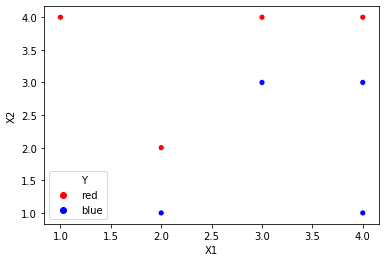

In [134]:
a=[3,2,4,1,2,4,4,3]
b=[4,2,4,4,1,3,1,3]
class_y=['red','red','red','red','blue','blue','blue','blue']
class_df=pd.DataFrame({'X1':a,'X2':b,'Y':class_y})
sns.scatterplot(x="X1", y="X2",hue='Y',data=class_df,palette=['red','blue'])